In [1]:
%matplotlib widget
from Model.Environment import Environment
from Interface.Classes.GameEditor import EnvironmentWidget
from Interface.Classes.EnvGraphDisplay import EnvGraphDisplay
import ipywidgets as widgets
from IPython.display import display

Current directory: d:\Programming\ProgettoNashQ


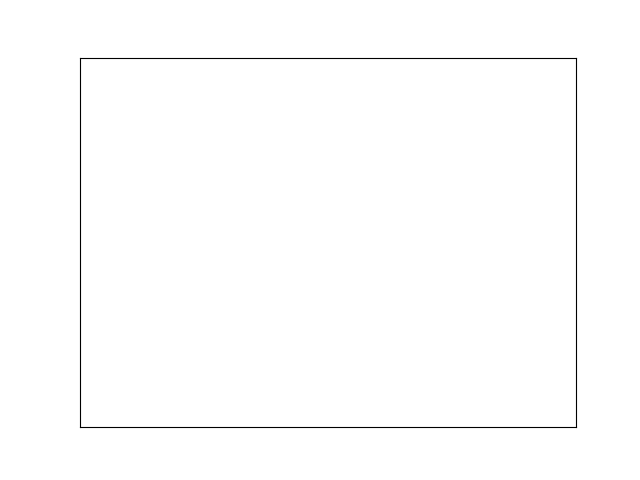

DiGraph with 2 nodes and 1 edges
Plotting the graph
Graph plotted
DiGraph with 2 nodes and 2 edges
Plotting the graph
Graph plotted
DiGraph with 2 nodes and 2 edges
Plotting the graph
Graph plotted
DiGraph with 2 nodes and 2 edges
Plotting the graph
Graph plotted
DiGraph with 2 nodes and 2 edges
Plotting the graph
Graph plotted


In [2]:
env = Environment(2, 2)
envWidget = EnvironmentWidget(env)
envGraph = EnvGraphDisplay(env)

vBox = widgets.VBox([envGraph.get_widget(), envWidget.getWidget()])
display(vBox)